In [35]:
#evaluating and comparing multiple models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

In [80]:
#Loads the neuron output
#first column represents the high temprature neuron output, the other represents the low temperature neuron
#we choose the high temperature neuron

o_500= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_500.csv').iloc[:,1]
y_500 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_500.csv').iloc[:,1]

#number of networks trained
data_size=14


#saves the neural network outputs for each network, index 0 is the largest ammount of hidden neurons (500)
# and descends from there the lowest being 1
n_output = np.zeros((len(y_500),data_size))
#saves true values for the data
y_true = np.zeros((len(y_500),data_size))

n_output[:,0]=o_500
y_true[:,0]=y_500
n_output[:,1]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_450.csv').iloc[:,1]
y_true[:,1] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_450.csv').iloc[:,1]
n_output[:,2]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_400.csv').iloc[:,1]
y_true[:,2] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_400.csv').iloc[:,1]
n_output[:,3]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_350.csv').iloc[:,1]
y_true[:,3] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_350.csv').iloc[:,1]
n_output[:,4]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_300.csv').iloc[:,1]
y_true[:,4] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_300.csv').iloc[:,1]
n_output[:,5]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_250.csv').iloc[:,1]
y_true[:,5] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_250.csv').iloc[:,1]
n_output[:,6]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_200.csv').iloc[:,1]
y_true[:,6] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_200.csv').iloc[:,1]
n_output[:,7]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_150.csv').iloc[:,1]
y_true[:,7] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_150.csv').iloc[:,1]
n_output[:,8]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_100.csv').iloc[:,1]
y_true[:,8] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_100.csv').iloc[:,1]
n_output[:,9]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_50.csv').iloc[:,1]
y_true[:,9] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_50.csv').iloc[:,1]
n_output[:,10]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_20.csv').iloc[:,1]
y_true[:,10] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_20.csv').iloc[:,1]
n_output[:,11]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_10.csv').iloc[:,1]
y_true[:,11] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_10.csv').iloc[:,1]
n_output[:,12]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_3.csv').iloc[:,1]
y_true[:,12] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_3.csv').iloc[:,1]
n_output[:,13]= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/n_1.csv').iloc[:,1]
y_true[:,13] = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising NN/32x32/L2_reg/true_1.csv').iloc[:,1]

In [126]:
#calculates precision recall parameters in function of the threshold t 
#takes the first neuron (high temperature) index corresponds to the largest ammount of hidden neurons (500)
# and descends from there the lowest being 1

#pre = np.zeros((765,data_size))
#rec = np.zeros((765,data_size))
#t = np.zeros((765,data_size))
pre=[]
rec=[]
tre=[]
#saves the f1 indexes for each network
f1=[]
#area under curve values for each network
auc=[]
for i in range(0,data_size):
    p, r, t = sklearn.metrics.precision_recall_curve(y_true[:,i], n_output[:,i])
    pre.append(p)
    rec.append(r)
    tre.append(t)
    f1.append(max(2*(pre[i]*rec[i]/(pre[i]+rec[i]))))
    auc.append(-np.trapz(pre[i], rec[i]))

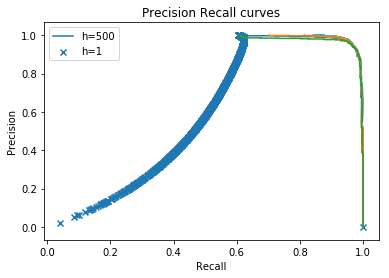

In [127]:
plt.plot(pre[0],rec[0],label='h=500')
plt.scatter(pre[13],rec[13],label='h=1', marker='x')


for i in range(1,data_size-1):
    plt.plot(pre[i],rec[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curves')
plt.legend()

In [133]:
ii = np.where(f1 == max(f1))[0]
jj= np.where(auc == max(auc))[0]
print('best f1 index found in',ii,'which corresponds to 50 hidden neurons')
print('best auc index found in',jj,'which corresponds to 100 hidden neurons')


d={'f1':f1, 'auc':auc}
performance=pd.DataFrame(d)

performance

best f1 index found in [9] which corresponds to 50 hidden neurons
best auc index found in [8] which corresponds to 100 hidden neurons


,f1,auc
0,0.964204,0.993258
1,0.964885,0.993290
2,0.964095,0.993464
3,0.964095,0.993397
4,0.964885,0.993316
5,0.964204,0.993442
6,0.964885,0.993438
7,0.964885,0.993626
8,0.964939,0.993660
9,0.965675,0.993585


Text(0.5,1,'Precision Recall curves')

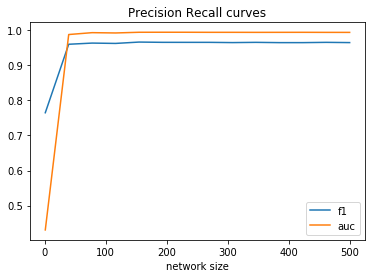

In [140]:
xx=np.linspace(500,1,14)
plt.plot(xx,f1,label='f1')
plt.plot(xx,auc,label='auc')
plt.legend()
plt.xlabel('network size')
plt.title('Precision Recall curves')